# **PROJET 9 DATA ANALYST - CLUSTERING**

Produisez une étude de marché avec R ou Python

SOMMAIRE :

ETAPE 1 : Importation des librairies et du dataset

ETAPE 2 : Classification ascendante hiérarchique

ETAPE 3 : K-Means

ETAPE 4 : Analyse en composantes principales

ETAPE 5 : Analyse des centroïdes

ETAPE 6 : Recommandations


## ETAPE 1 : Importation des librairies et du dataset

In [ ]:
#Importation de la librairie Pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import seaborn as sns

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import cluster, metrics
from sklearn import decomposition
from math import pi
import scipy.stats as st

import warnings
warnings.filterwarnings('ignore')
import matplotlib.patches as mpatches

#Affichage des nombres : séparateur des milliers, et réduction du nombre de décimales
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
#Accès au google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importation du fichier DisponibiliteAlimentaire_2017.csv
merged_df_csv ='/content/drive/MyDrive/Herbet_Thomas_P9/merged_df.csv'
merged_df = pd.read_csv(merged_df_csv, sep=',')

## ETAPE 2 : Classification ascendante hiérarchique

In [ ]:
#Suppression de la colonne 'Produit' du DataFrame directement
merged_df.drop('Produit', axis=1, inplace=True)
#Affichage du dataframe
merged_df

,Zone,Exportations - Quantité,Importations - Quantité,Production,%croissance,nb_hab_17,RNB_habitant,Prix_poulet_US$,nb_poulet_tonnes,Conso_poulet_tonnes,%poulet_consommé_viande,Tx_dépendance_importations
0,Afghanistan,0.00,29.00,28.00,2.58,"36,296,113.00",537.13,"26,227,000.00","13,573,000.00","55,000.00",15.07,0.00
1,Afrique du Sud,63.00,514.00,"1,667.00",1.43,"57,009,756.00","6,537.50","7,394,000.00","167,033,000.00","2,035,000.00",54.94,24.27
2,Albanie,0.00,38.00,13.00,-0.08,"2,884,169.00","4,532.79","3,266,000.00","7,835,000.00","47,000.00",30.72,74.51
3,Algérie,0.00,2.00,275.00,2.07,"41,389,189.00","4,081.78","19,051,000.00","134,827,000.00","264,000.00",32.80,0.72
4,Allemagne,646.00,842.00,"1,514.00",0.57,"82,658,409.00","45,734.56","193,759,000.00","160,000,000.00","1,609,000.00",21.83,49.24
...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,94.00,433.00,48.00,1.35,"9,487,203.00","42,828.65","2,297,000.00","23,841,000.00","412,000.00",67.21,111.89
168,Équateur,0.00,0.00,340.00,1.78,"16,785,361.00","6,100.41","16,405,000.00","160,556,000.00","324,000.00",40.45,0.00
169,États-Unis d'Amérique,"3,692.00",123.00,"21,914.00",0.64,"325,084,756.00","60,297.39","8,580,000.00","1,486,000,000.00","18,100,000.00",44.72,0.67
170,Éthiopie,0.00,1.00,14.00,2.70,"106,399,924.00",705.54,"91,000.00","56,056,000.00","14,000.00",2.05,0.00


In [ ]:
#Indexation sur la colonne Zone qui représente les pays
merged_df.set_index('Zone', inplace=True)
x = merged_df.values
#Affichage des dimensions du dataframe
x.shape

(172, 11)

In [ ]:
#Normalisation des données à l'aide de la Standardisation (StandardScaler)
std_scale = preprocessing.StandardScaler().fit(x)
x_scaled = std_scale.transform(x)
#Utilisation ces données normalisées pour créer une matrice de liaison (linkage matrix) pour l'analyse de clustering
z = linkage(x_scaled, method='ward', metric='euclidean')
#Création d'un nouveau dataframe
scaled_df = pd.DataFrame(x_scaled, columns=merged_df.columns, index=merged_df.index)
#Affichage du dataframe
scaled_df.head()

,Exportations - Quantité,Importations - Quantité,Production,%croissance,nb_hab_17,RNB_habitant,Prix_poulet_US$,nb_poulet_tonnes,Conso_poulet_tonnes,%poulet_consommé_viande,Tx_dépendance_importations
Zone,,,,,,,,,,,
Afghanistan,-0.23,-0.32,-0.28,1.16,-0.04,-0.71,0.67,-0.25,-0.28,-1.13,-0.66
Afrique du Sud,-0.09,2.30,0.39,0.14,0.09,-0.37,-0.10,0.05,0.65,0.82,-0.13
Albanie,-0.23,-0.27,-0.28,-1.19,-0.26,-0.48,-0.27,-0.27,-0.28,-0.37,0.97
Algérie,-0.23,-0.47,-0.18,0.71,-0.01,-0.51,0.38,-0.01,-0.18,-0.26,-0.64
Allemagne,1.19,4.07,0.33,-0.62,0.26,1.82,7.53,0.04,0.45,-0.80,0.42


In [ ]:
#Création de 2 arrays numpy avec les pays et l'autre avec les indicateurs
zone = scaled_df.index.to_numpy()
kpi = scaled_df.columns.to_numpy()

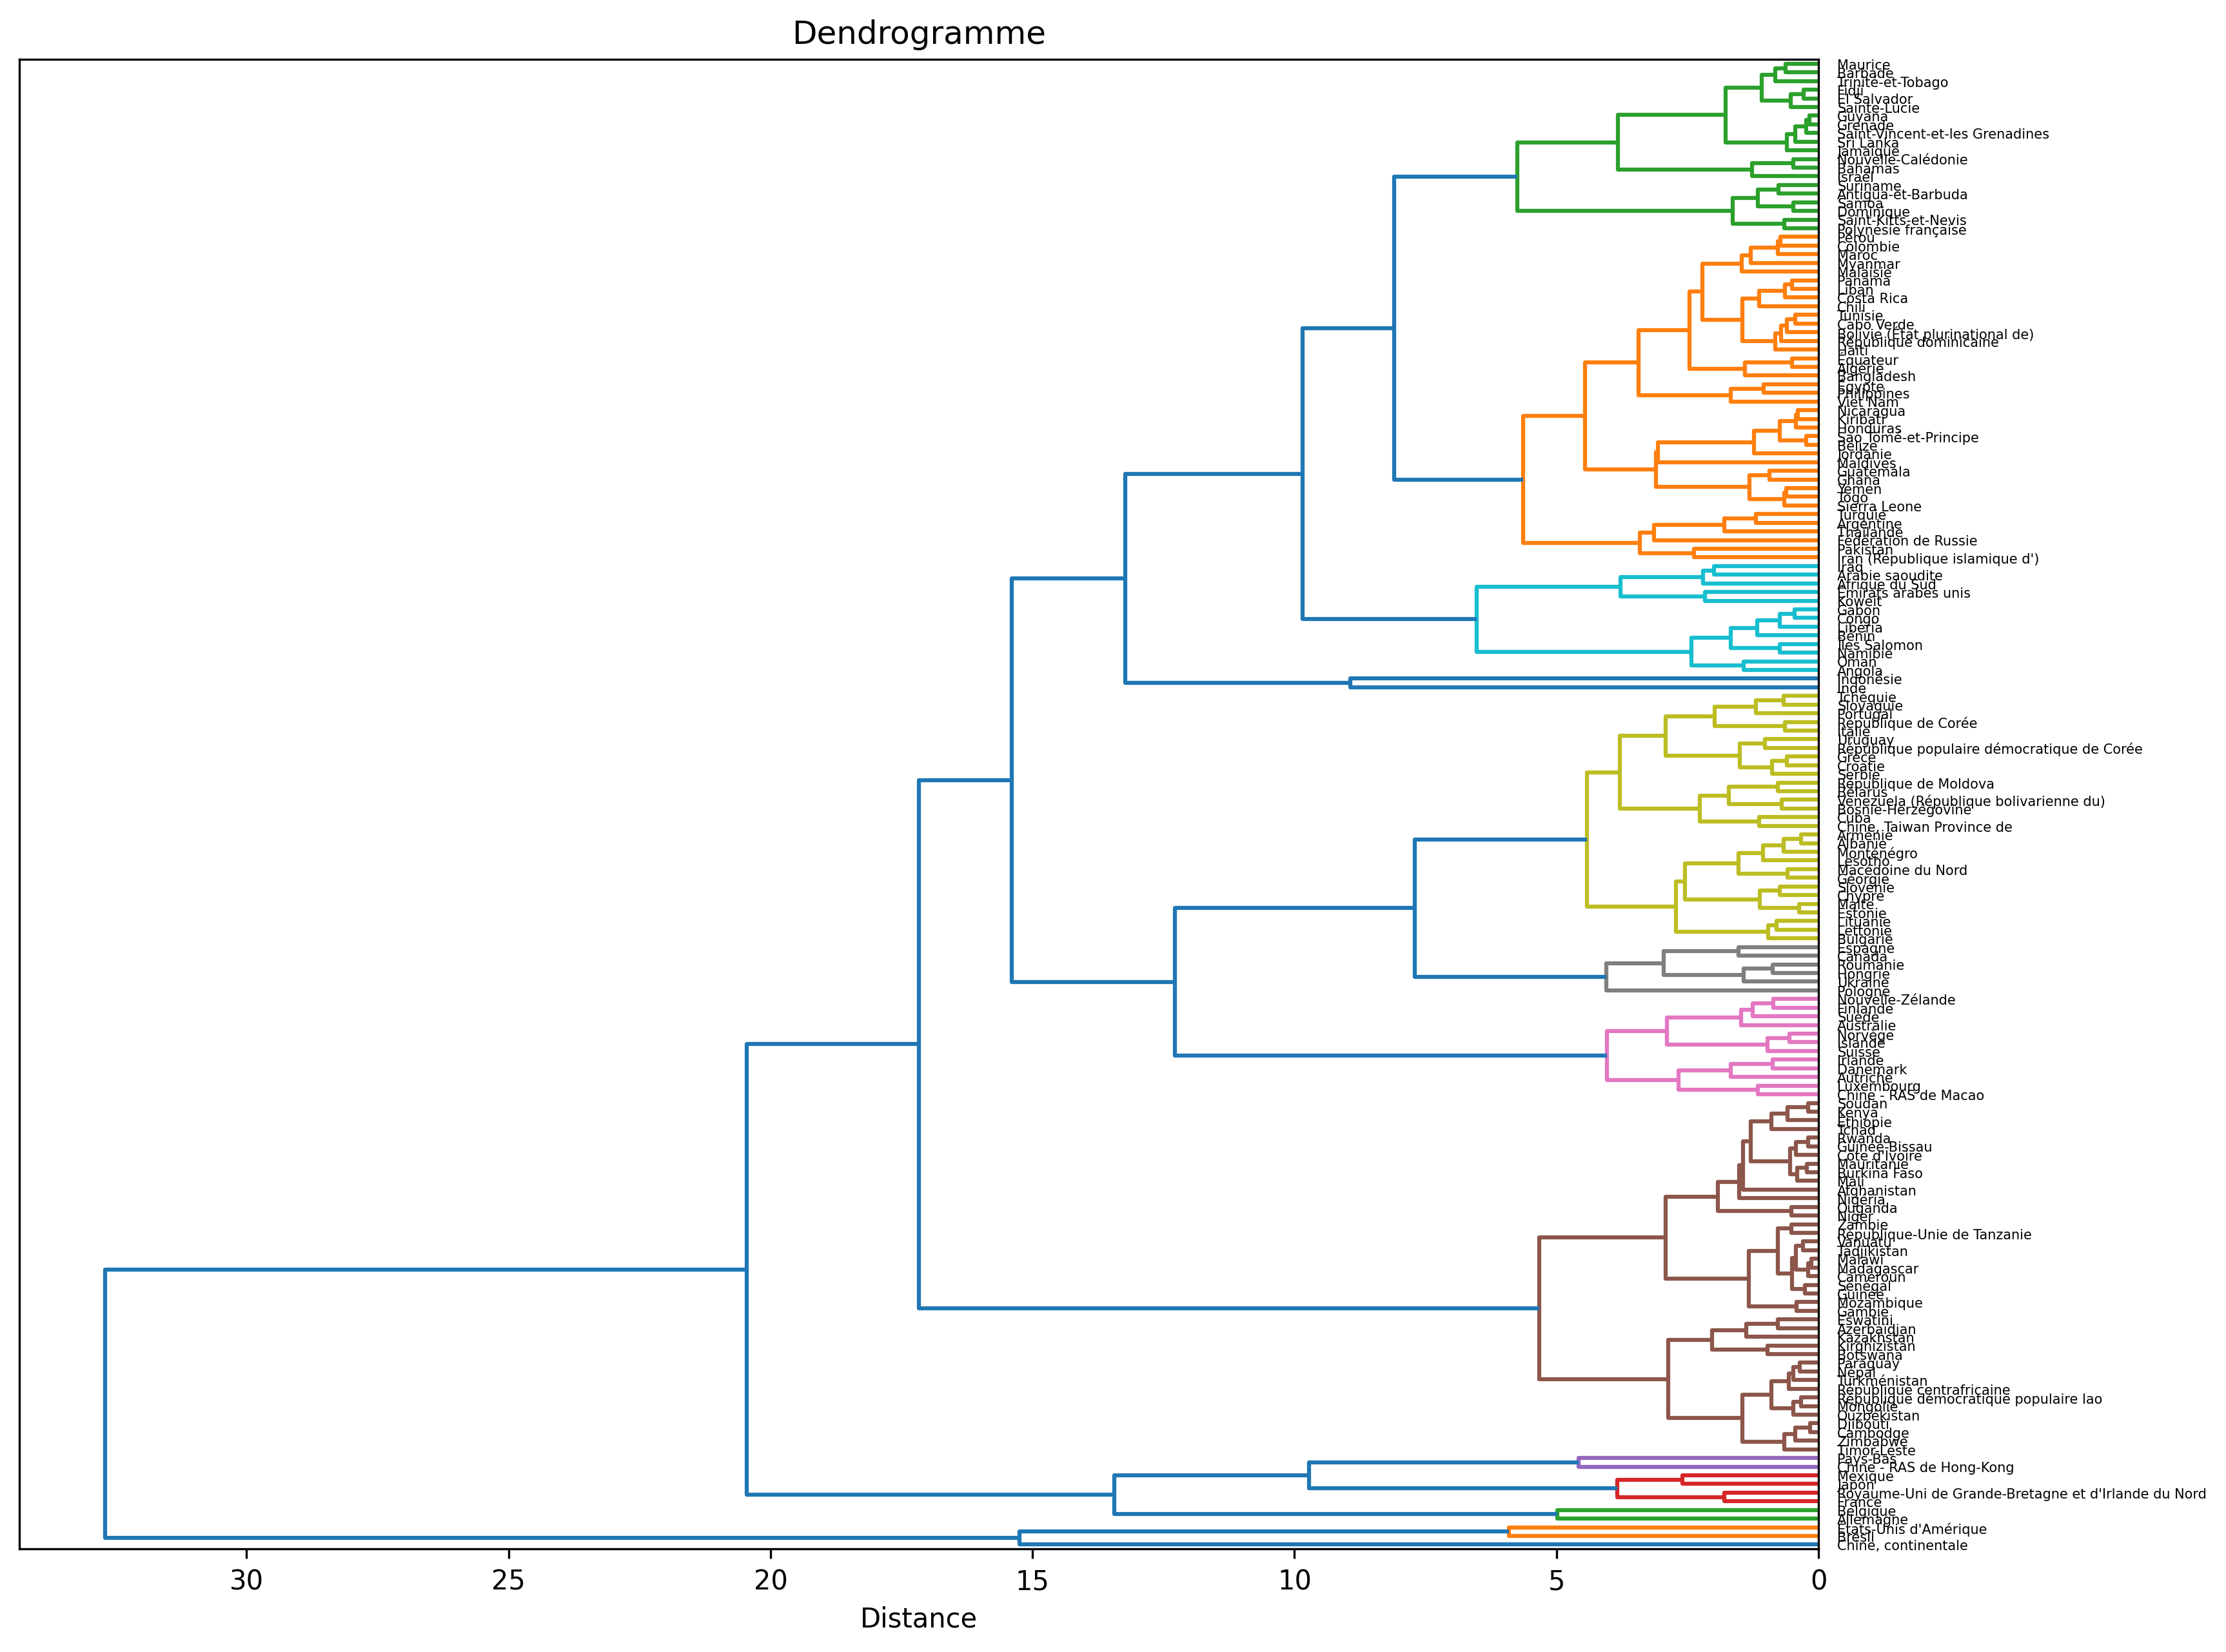

In [ ]:
#Affichage du dendogramme
plt.figure(figsize=(12, 10), dpi=300)
plt.title('Dendrogramme')
plt.xlabel('Distance')
plt.grid(False)
dendrogram(z, labels=merged_df.index, orientation="left", color_threshold=7)
#Affichage du dendrogramme
plt.show()


Il y a un peu moins de 200 pays sur ce diagramme, celà est donc difficile de choisir un niveau de clustering pour autant d'individu. Celà est purement subjectif. Pour ma part je vais retenir 10 clustering.

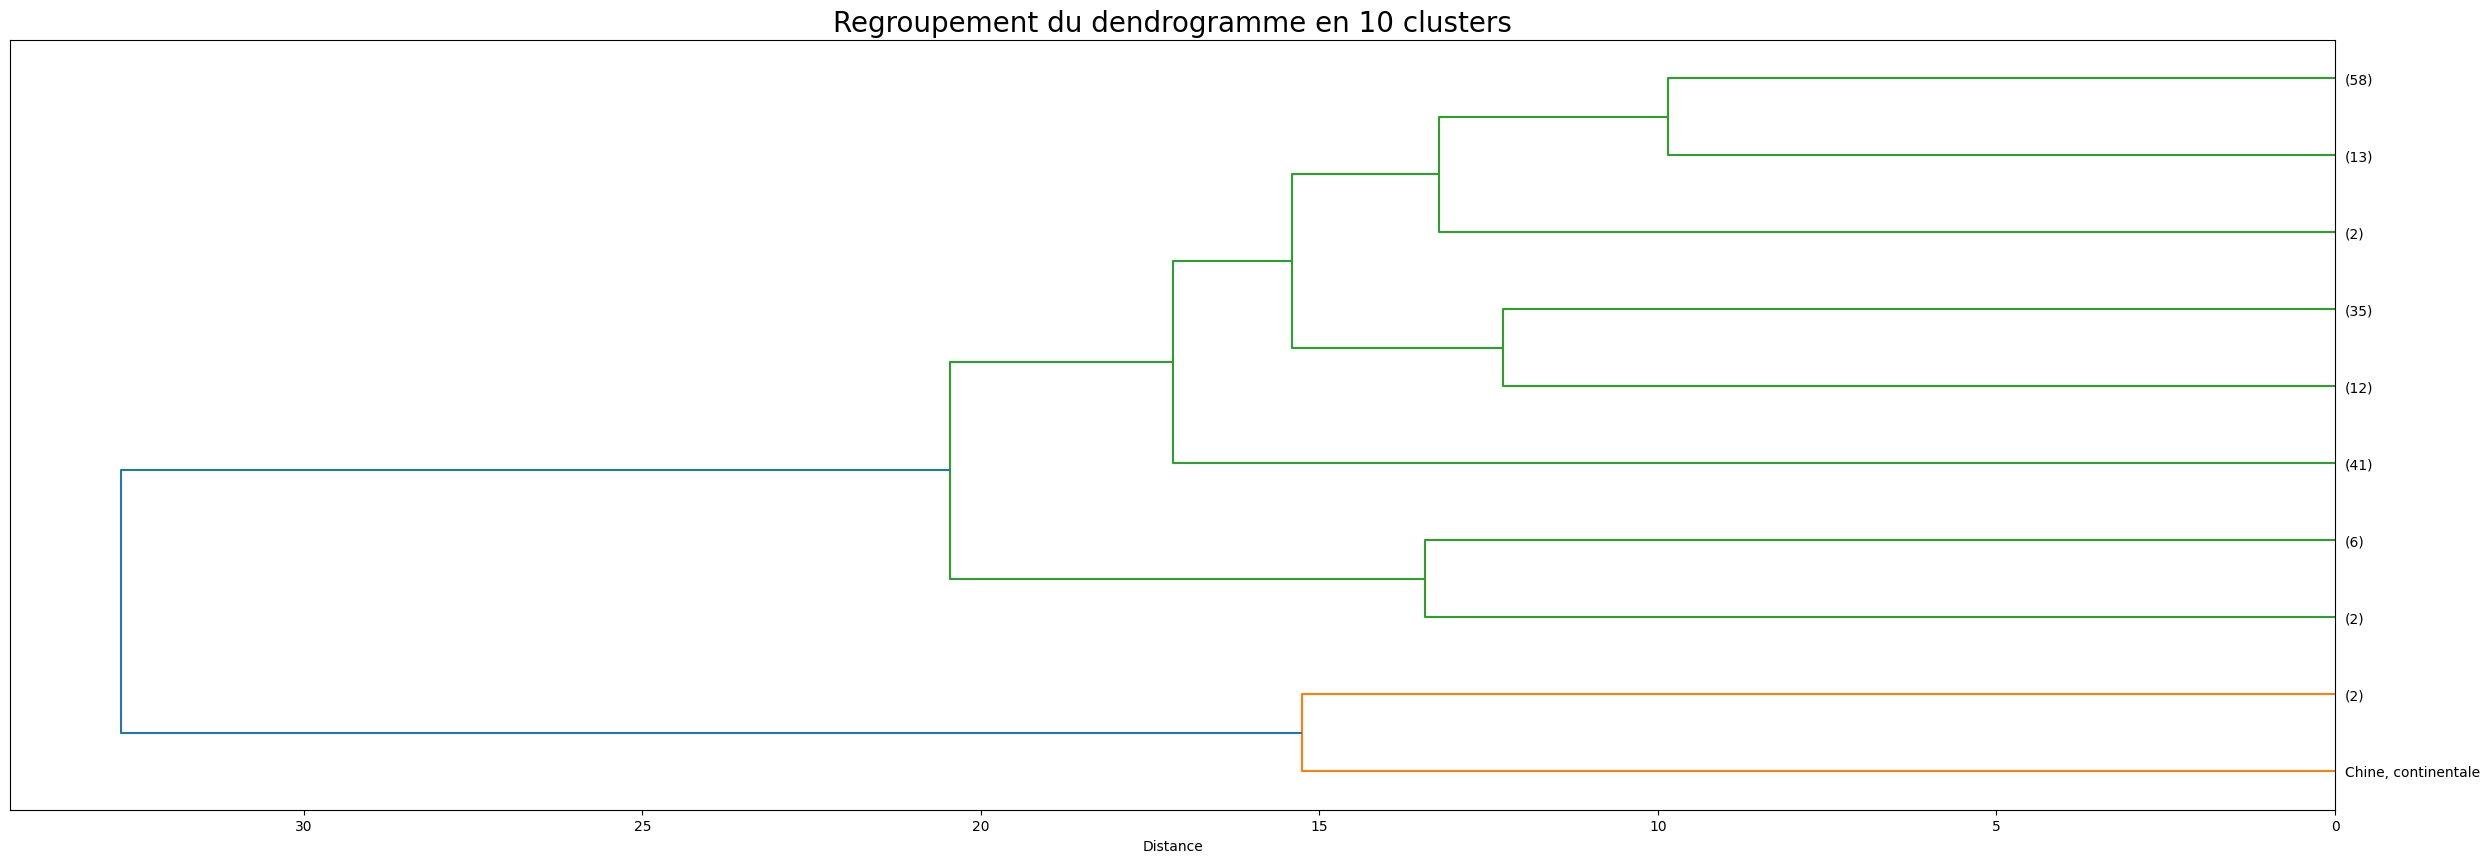

In [ ]:
#Coupage du dendrogramme en 10 groupes pour avoir une première idée du partitionnement
fig = plt.figure(figsize=(30,10))
plt.title('Regroupement du dendrogramme en 10 clusters', fontsize=20)
plt.xlabel('Distance', fontsize=10)
#Paramètrage du dendrogramme
plt.grid(False)
dendrogram(z, labels = merged_df.index, p=10, truncate_mode='lastp', leaf_font_size=10, orientation='left')
#Affichage du dendrogramme
plt.show()

In [ ]:
#Affichage des 10 clusters
labels = fcluster(z, 10, criterion='maxclust')
print('Voici les clusters : ' + str(np.unique(labels)))

Voici les clusters : [ 1  2  3  4  5  6  7  8  9 10]


In [ ]:
#Ajout des clusters dans le dataframe 'merged_df'
merged_df['CAH']=labels

In [ ]:
#Création d'un dictionnaire
zones_par_cluster = {}

#Agrégat du DataFrame 'merged_df' par la colonne 'CAH' et itération sur les groupes
for cluster, groupe in merged_df.groupby('CAH'):
#Stockage du nombre de zones et les zones associées à chaque cluster dans le dictionnaire
    zones_par_cluster[cluster] = {'nombre_de_zones': len(groupe), 'zones': list(groupe.index)}

#Affichage du nombre de zones et de la liste des zones pour chaque cluster
for cluster, info_cluster in zones_par_cluster.items():
    nombre_de_zones = info_cluster['nombre_de_zones']
    zones = info_cluster['zones']
    print(f"Cluster {cluster} - {nombre_de_zones} pays : {zones}")

del zones_par_cluster, cluster, groupe, info_cluster, nombre_de_zones, zones

Cluster 1 - 2 pays : ['Brésil', "États-Unis d'Amérique"]
Cluster 2 - 1 pays : ['Chine, continentale']
Cluster 3 - 2 pays : ['Allemagne', 'Belgique']
Cluster 4 - 6 pays : ['Chine - RAS de Hong-Kong', 'France', 'Japon', 'Mexique', 'Pays-Bas', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]
Cluster 5 - 41 pays : ['Afghanistan', 'Azerbaïdjan', 'Botswana', 'Burkina Faso', 'Cambodge', 'Cameroun', "Côte d'Ivoire", 'Djibouti', 'Eswatini', 'Gambie', 'Guinée', 'Guinée-Bissau', 'Kazakhstan', 'Kenya', 'Kirghizistan', 'Madagascar', 'Malawi', 'Mali', 'Mauritanie', 'Mongolie', 'Mozambique', 'Niger', 'Nigéria', 'Népal', 'Ouganda', 'Ouzbékistan', 'Paraguay', 'Rwanda', 'République centrafricaine', 'République démocratique populaire lao', 'République-Unie de Tanzanie', 'Soudan', 'Sénégal', 'Tadjikistan', 'Tchad', 'Timor-Leste', 'Turkménistan', 'Vanuatu', 'Zambie', 'Zimbabwe', 'Éthiopie']
Cluster 6 - 12 pays : ['Australie', 'Autriche', 'Chine - RAS de Macao', 'Danemark', 'Finlande', 'Irlande', 'Isl

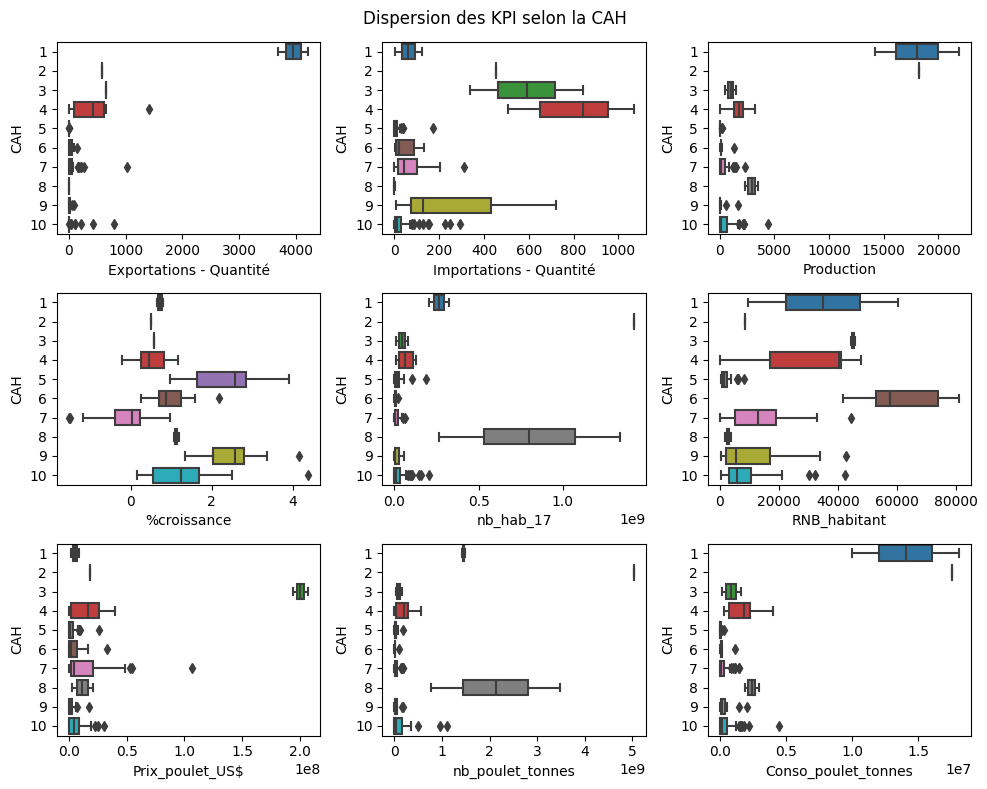

In [ ]:
#Traçage le graphique pour chaque indicateur
fig, axs = plt.subplots(3, 3, figsize=(10, 8))
#Paramétrage des graphiques
for i, indicateur in enumerate(kpi):
    if i < 9:
        r = i // 3
        c = i % 3
        sns.boxplot(data=merged_df, x=indicateur, y='CAH', orient='h', ax=axs[r, c])
#Suppression des graphiques vides
[fig.delaxes(ax) for ax in axs.flatten() if not ax.has_data()]
fig.suptitle('Dispersion des KPI selon la CAH')
fig.tight_layout()
#Affichage des graphiques
plt.show()
#Suppression des variables
del i, indicateur, r, c

Nous allons nous concentrer sur les indicateurs les plus pertinents tels que : la production, l'importation, l'exportation et la consommation de poulet. Car nous voulons cibler les pays dont la consommation de poulet est élevé et dont les exportation de poulet sont faibles puisque cela signifie qu'il y a de la demande et peu de concurrent. Au regarde de ces 4 indicateurs on constate très vite les marché que l'on doit éviter tels que les Etats-Unis et le Brésil (Cluster n°1). Par contre le marché idéal se toruve parmi les cluster 3 et 4.

## ETAPE 3 : K-means

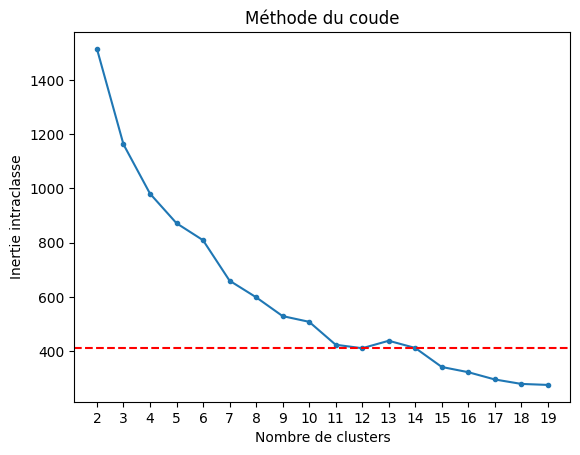

In [ ]:
#Initialisation des variables
n_clusters_range = range(2, 20)
inertias=[]

#Calcul de l'inertie pour chaque valeur du nombre de clusters
for n_clusters in n_clusters_range:
    clustering = KMeans(n_clusters=n_clusters, n_init='auto', init='random', random_state=0)
    clustering = clustering.fit(x_scaled)
    inertias.append(clustering.inertia_)

#Paramétrage du graphique
fig, ax = plt.subplots()
plt.grid(False)

plt.plot(n_clusters_range, inertias, marker='.')
plt.axhline(y=inertias[10], linestyle = '--', color='r')

#Définition de la position des graduations
ax.xaxis.set_major_locator(ticker.IndexLocator(1, 0))

#Légendes
ax.set_title('Méthode du coude')
ax.set_xlabel('Nombre de clusters')
ax.set_ylabel('Inertie intraclasse')

#Affichage du graphique
plt.show()

#Suppression des variables
del n_clusters_range, inertias, n_clusters, clustering, fig, ax

D'après la méthode du coude, il nous faut choisir 12 cluster car la droite croise le point qui se trouve sur le nombre 12 en axe des abscisses.

In [ ]:
#Initialisation du nombre de clusters
n_clusters = 12

#Réalisation des calculs pour identifier les clusters
clustering = KMeans(n_clusters=n_clusters, n_init='auto', init='random',
                    random_state=0)
clustering.fit(x_scaled)

KMeans(init='random', n_clusters=12, n_init='auto', random_state=0)

In [ ]:
#Création d'une colonne pour stocker les groupes de clusters
merged_df['cluster_kmeans'] = clustering.labels_ + 1

In [ ]:
#Création d'un dictionnaire
zones_par_cluster = {}

#Agrégat du DataFrame 'merged_df' par la colonne 'cluster_kmeans' et itération sur les groupes
for cluster, groupe in merged_df.groupby('cluster_kmeans'):
#Stockage du nombre de zones et les zones associées à chaque cluster dans le dictionnaire
    zones_par_cluster[cluster] = {'nombre_de_zones': len(groupe), 'zones': list(groupe.index)}

#Affichage du nombre de zones et de la liste des zones pour chaque cluster
for cluster, info_cluster in zones_par_cluster.items():
    nombre_de_zones = info_cluster['nombre_de_zones']
    zones = info_cluster['zones']
    print(f"Cluster {cluster} - {nombre_de_zones} pays : {zones}")

Cluster 1 - 9 pays : ['Afrique du Sud', 'Arabie saoudite', 'Chine - RAS de Hong-Kong', 'France', 'Japon', 'Mexique', 'Pays-Bas', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Émirats arabes unis']
Cluster 2 - 37 pays : ['Algérie', 'Argentine', 'Azerbaïdjan', 'Bangladesh', 'Belize', 'Bolivie (État plurinational de)', 'Cabo Verde', 'Chili', 'Colombie', 'Costa Rica', 'Guatemala', 'Haïti', 'Honduras', "Iran (République islamique d')", 'Israël', 'Jordanie', 'Kiribati', 'Liban', 'Malaisie', 'Maldives', 'Maroc', 'Myanmar', 'Nicaragua', 'Nouvelle-Calédonie', 'Pakistan', 'Panama', 'Philippines', 'Pérou', 'République dominicaine', 'Sao Tomé-et-Principe', 'Sierra Leone', 'Togo', 'Tunisie', 'Turquie', 'Yémen', 'Égypte', 'Équateur']
Cluster 3 - 13 pays : ['Australie', 'Autriche', 'Canada', 'Chine - RAS de Macao', 'Danemark', 'Finlande', 'Irlande', 'Islande', 'Luxembourg', 'Norvège', 'Nouvelle-Zélande', 'Suisse', 'Suède']
Cluster 4 - 1 pays : ['Chine, continentale']
Cluster 5 - 3 pays : ['

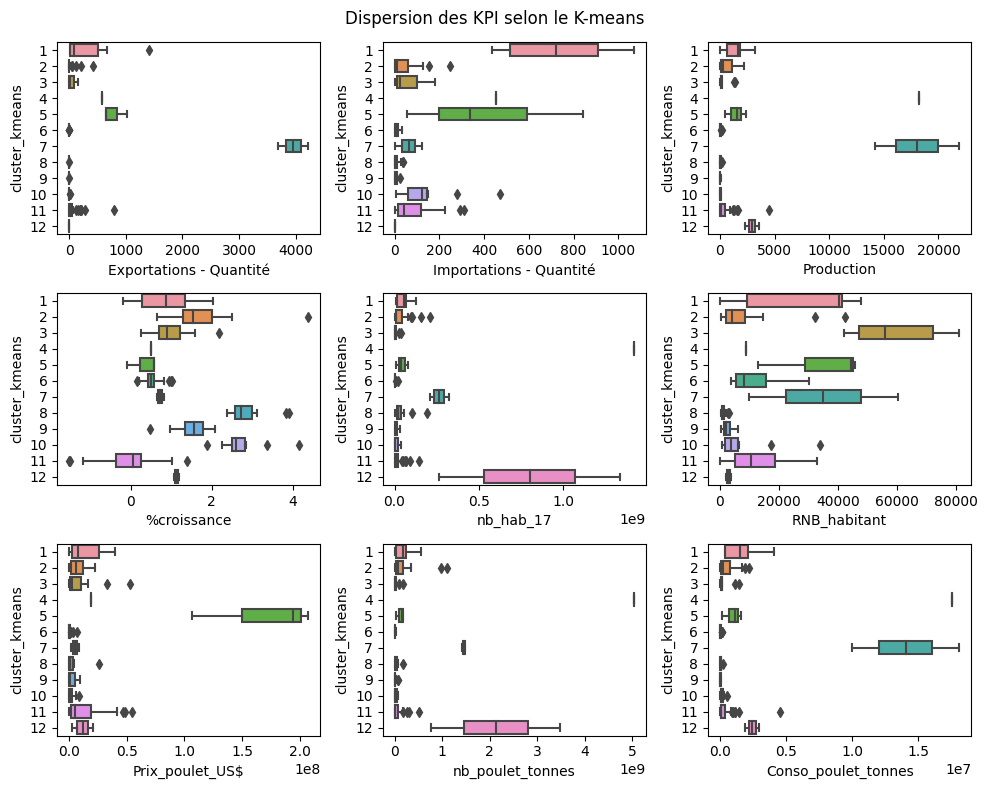

In [ ]:
#Traçage du graphique pour chaque indicateur
fig, axs = plt.subplots(3, 3, figsize=(10, 8))
#Paramétrage des graphiques
for i, indicateur in enumerate(kpi):
    if i < 9:
        r = i // 3
        c = i % 3
        sns.boxplot(data=merged_df, x=indicateur, y='cluster_kmeans', orient='h', ax=axs[r, c])
#Suppression des graphiques vides
[fig.delaxes(ax) for ax in axs.flatten() if not ax.has_data()]
#Titre des graphiques
fig.suptitle('Dispersion des KPI selon le K-means')
fig.tight_layout()
#Affichage des graphiques
plt.show()


Nous allons nous concentrer sur les indicateurs les plus pertinents tels que : la production, l'importation, l'exportation et la consommation de poulet. Car nous voulons cibler les pays dont la consommation de poulet est élevée et dont les exportation de poulet sont faibles puisque cela signifie qu'il y a de la demande et peu de concurrent. Au regard de ces 4 indicateurs on identifie très vite les marché que nous devons éviter tels que la Chine (Cluster n°4), les Etats-Unis et le Brésil (Cluster n°7). Par contre le marché idéal se trouve parmi les cluster 1, 2 et 5.

## ETAPE 4 : Analyse en composantes principales (PCA)

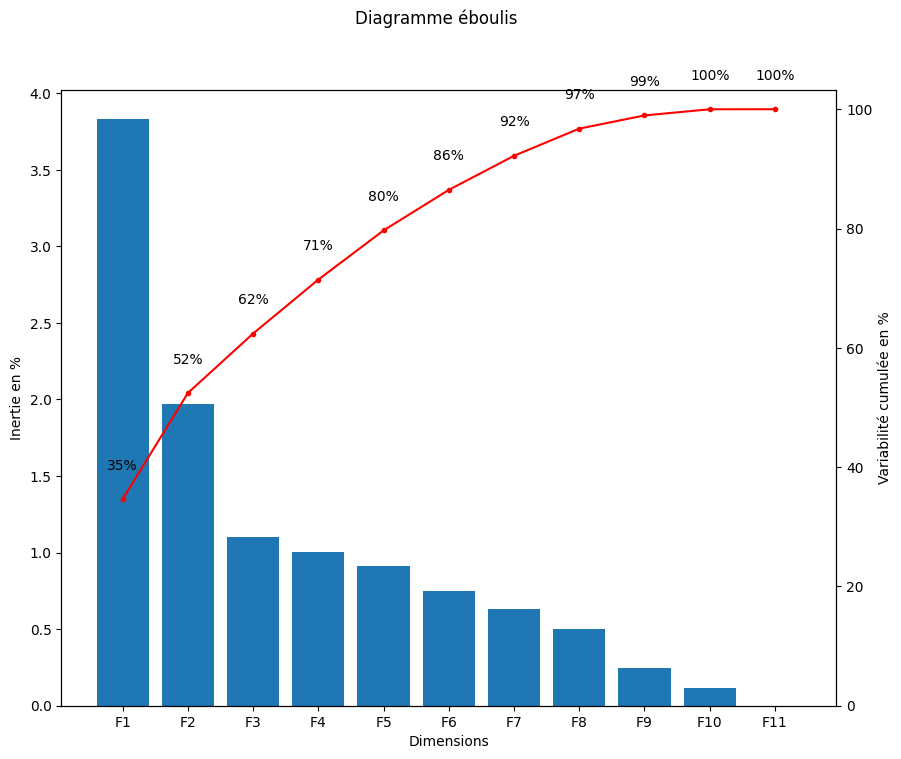

In [ ]:
#Réalisation du PCA sur les données centrées
pca = PCA()
pca = pca.fit(x_scaled)
#Initialisation des variables
components = np.arange(1, (len(pca.explained_variance_)+1))
components = [f'F{x}' for x in components]
cum_variance_ratio = pca.explained_variance_ratio_.cumsum()
#Traçage les graphiques
fig, ax1 = plt.subplots(figsize=(10, 8))
plt.grid(False)
ax2 = ax1.twinx()
#Paramétrage des graphiques
ax1.bar(components, pca.explained_variance_,)
ax2.plot(components, cum_variance_ratio, color='red', marker='.')
for x, y in enumerate(cum_variance_ratio):
    ax2.text(x,(y+0.05),f'{y:.0%}', ha='center')
ax2.set_ylim(bottom=0)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: round(x*100)))
plt.grid(False)
#Titre et légendes
fig.suptitle('Diagramme éboulis')
ax1.set_xlabel('Dimensions')
ax1.set_ylabel('Inertie en %')
ax2.set_ylabel('Variabilité cumulée en %')
#Affichage du graphique
plt.show()
#Suppréssion des variables
del pca, components, cum_variance_ratio, fig, ax1, ax2, x, y

On constate que F5 concentre 80 % de la variation. La représentation sur 5 dimensions est suffisante.

In [ ]:
#Découpage en 5 dimensions
pca = PCA(n_components=5)
pca.fit(x_scaled)
X_pca = pca.transform(x_scaled)

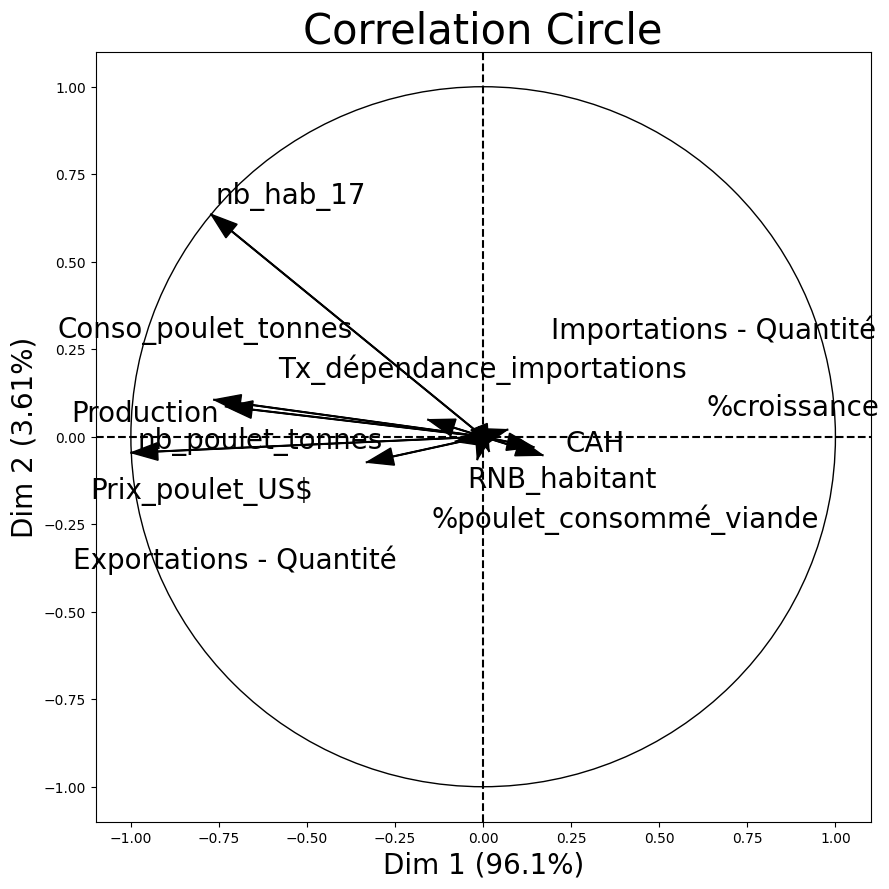

In [ ]:
#Réalisation du cercle de corrélation
from mlxtend.plotting import plot_pca_correlation_graph
figure, correlation_matrix = plot_pca_correlation_graph(merged_df.drop('cluster_kmeans', axis=1),merged_df.drop('cluster_kmeans', axis=1).columns.values, dimensions=(1, 2), figure_axis_size=10)

L’axe des abscisses représente la dimension 1 (Dim 1) qui explique 96.1% de la variance, et l’axe des ordonnées représente la dimension 2 (Dim 2) qui explique 3.01% de la variance. Au total ce cercle explique plus de 99 % de la variance ce qui est excellent.

On constate que les variables qui contribuent le plus à chaque composante sont :
- le nombre d'habitant,
- la production de volaille,
- et l'exportation.
C'est le nombre habitant avec le nombre de poulet qui ont la plus forte corrélation.

Liens entre les variables :
- plus le nombre d'habitant est élevé et plus un pays est dépendant des importations,
- plus le nombre d'habitant est élevé et plus le revenu disponible par habitant diminue,
- plus le revenu par habitant est faible et plus la consommation de poulet est faible,
- plus un pays exporte de poulet et moins il importe de poulet,
- plus la consommation de poulet est forte et plus il y a de production de poulet.

## ETAPE 5 : Analyse des centroïdes

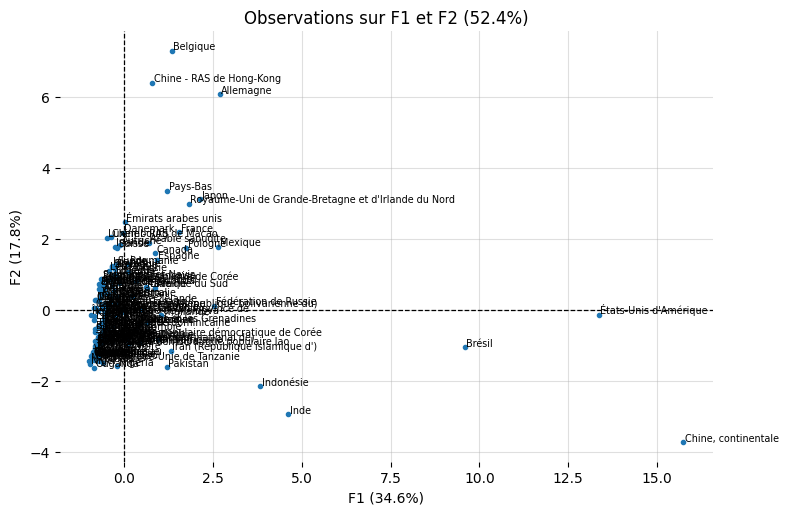

In [ ]:
#Initialisation des variables
x_d = 0
y_d = 1
labels = zone
pca = pca
X_pca = X_pca
text_offset = 0.04
#Réalisation du calcul de la variance relative
cum_variance_ratio = (pca.explained_variance_ratio_[x_d]+ pca.explained_variance_ratio_[y_d])
#Création de la figure
fig, ax = plt.subplots(figsize=(8, 8))
#Paramétrage du graphique
ax.set_aspect('equal')
ax.grid(alpha=0.4)
ax.set_axisbelow(True)
for spine in ax.spines.values():
    spine.set_visible(False)

#Paralétrage des eaxes ordonnées et abscisses
ax.axhline(y=0, linestyle='--', linewidth=0.9, color='k')
ax.axvline(x=0, linestyle='--', linewidth=0.9, color='k')
#Paramétrage des étiquettes de données
ax.scatter(X_pca[:, x_d], X_pca[:, y_d], marker='.')

#Ajout des étiquettes de données
for i in range(len(X_pca)):
    ax.text(x=(X_pca[i, x_d] + text_offset), y=(X_pca[i, y_d] + text_offset), s=labels[i], fontsize='x-small')
#Titre des axes
ax.set_xlabel(f'F{x_d + 1} ({pca.explained_variance_ratio_[x_d]:.1%})')
ax.set_ylabel(f'F{y_d + 1} ({pca.explained_variance_ratio_[y_d]:.1%})')
ax.set_title(f'Observations sur F{x_d + 1} et F{y_d + 1} 'f'({cum_variance_ratio:.1%})')
plt.tight_layout()
#Affichage du graphique
plt.show()


In [ ]:
#Réalisation du dataframe 'X_pca'
from re import X
X_pca = pd.DataFrame(X_pca)
centroide = pd.concat([merged_df.reset_index(), X_pca], axis=1, join='inner')
#Affichage du dataframe
centroide

,Zone,Exportations - Quantité,Importations - Quantité,Production,%croissance,nb_hab_17,RNB_habitant,Prix_poulet_US$,nb_poulet_tonnes,Conso_poulet_tonnes,%poulet_consommé_viande,Tx_dépendance_importations,CAH,cluster_kmeans,0,1,2,3,4
0,Afghanistan,0.00,29.00,28.00,2.58,"36,296,113.00",537.13,"26,227,000.00","13,573,000.00","55,000.00",15.07,0.00,5,8,-0.64,-0.83,1.64,-0.00,0.09
1,Afrique du Sud,63.00,514.00,"1,667.00",1.43,"57,009,756.00","6,537.50","7,394,000.00","167,033,000.00","2,035,000.00",54.94,24.27,9,1,0.88,0.62,-0.46,-1.49,0.14
2,Albanie,0.00,38.00,13.00,-0.08,"2,884,169.00","4,532.79","3,266,000.00","7,835,000.00","47,000.00",30.72,74.51,7,11,-0.60,0.51,-0.27,0.21,-0.37
3,Algérie,0.00,2.00,275.00,2.07,"41,389,189.00","4,081.78","19,051,000.00","134,827,000.00","264,000.00",32.80,0.72,10,2,-0.41,-0.82,0.62,0.00,-0.10
4,Allemagne,646.00,842.00,"1,514.00",0.57,"82,658,409.00","45,734.56","193,759,000.00","160,000,000.00","1,609,000.00",21.83,49.24,3,5,2.68,6.07,3.35,-0.45,-2.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,94.00,433.00,48.00,1.35,"9,487,203.00","42,828.65","2,297,000.00","23,841,000.00","412,000.00",67.21,111.89,9,1,0.02,2.47,-1.19,-1.39,0.86
168,Équateur,0.00,0.00,340.00,1.78,"16,785,361.00","6,100.41","16,405,000.00","160,556,000.00","324,000.00",40.45,0.00,10,2,-0.40,-0.72,0.15,0.08,-0.15
169,États-Unis d'Amérique,"3,692.00",123.00,"21,914.00",0.64,"325,084,756.00","60,297.39","8,580,000.00","1,486,000,000.00","18,100,000.00",44.72,0.67,1,7,13.36,-0.13,-1.32,4.15,4.61
170,Éthiopie,0.00,1.00,14.00,2.70,"106,399,924.00",705.54,"91,000.00","56,056,000.00","14,000.00",2.05,0.00,5,8,-0.61,-1.48,1.89,0.02,0.32


In [ ]:
# Moyenne par cluster de chaque composante issue de l'ACP (centroïdes)
centroides = centroide.groupby(['CAH']).mean().reset_index()

centroides['cluster'] = 'centroïde'

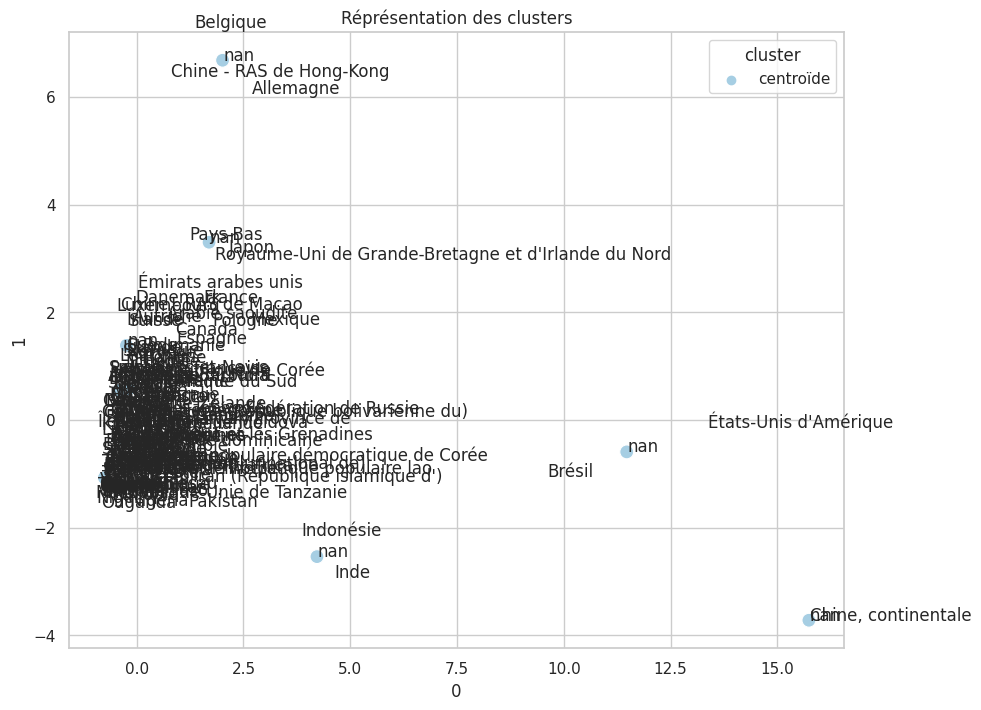

In [ ]:
#Paramétrage du graphique
sns.set(style='whitegrid', context='notebook', palette='Paired', rc={'figure.figsize':(10, 8)})
plt.figure(figsize=(10, 8))
#Concaténation des 2 dataframes
centroides_df = pd.concat([centroide, centroides])
#Réalisation du graphique à nuage de point
ax = sns.scatterplot(data=centroides_df, x=0, y=1, hue='cluster', s=100)
#Affichage des étiquettes de données
for i, point in centroides_df.iterrows():
    ax.text(point[0] + 0.02, point[1], str(point['Zone']))
#Titre
plt.title('Réprésentation des clusters')
#Affichage du graphique
plt.show()


Nous pouvons distinguer 6 centroïdes et former des groupes de pays. Par exemple Hong-Kong, Allemange et Belgique puis un autre groupe Etats Unis d'Amérique et Brésil. Grâce au cercle des corrélations, nous pouvons voir ce qui distingue les clusters : le nombre d'habitant en axe des ordonnées et l'exportation de poulet en axe des abscisses. Effectivement la Chine et L'inde se retrouve tout en bas car ce sont les pays les plus peuplés et la Chine ainsi que les Etats-Unis sont à droite car ce sont des pays qui exportent beaucoup de poulet et qui de ce fait en produisent en grande quantité.

## ETAPE 6 : Recommandations

Au regard des résultats des différentes analyses, il faut privilégier les pays suivants pour nos exportations :
- Allemagne,
- Belgique,
- Pologne,
- Pays-Bas,
-et Royaume-Unis.

En effet il font partie des clusters 1, 2 et 5 et de plus ils ont l'avantages de faire partie de l'union-européenne (sauf le Royaume-Unis). Ces pays se caractérisent par une forte consommation de poulet et une concurrence réduite. Puis la monnaie, les réglementations, la fiscalité et la douane sont les mêmes. Enfin d'un point de vue logistique celà sera moins couteux.
